___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## Tasks

Mentoring Prep. and self study 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.rename(columns = {'CustomerID':'id','Gender': 'Gender', 'Age' : 'Age', 'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace = True)
df

,id,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   Income  200 non-null    int64 
 4   Score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop(['id'], axis=1, inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


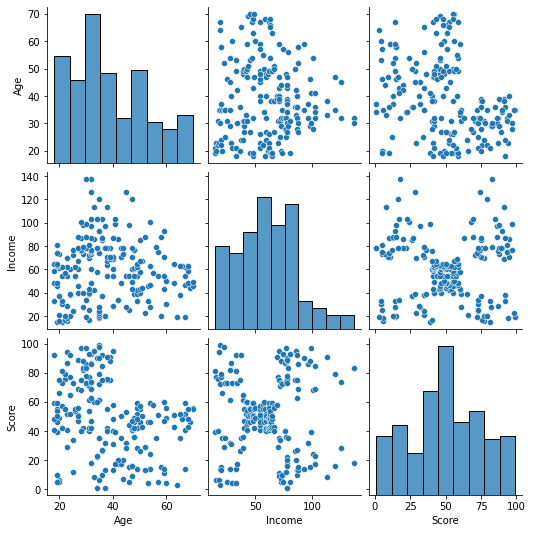

In [8]:
sns.pairplot(df)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Preprocess

### Encode Categories

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
cat = df.select_dtypes("object").columns
cat

Index(['Gender'], dtype='object')

In [11]:
enc = OrdinalEncoder()
df[cat] = enc.fit_transform(df[cat])
df.head()

,Gender,Age,Income,Score
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40


### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [12]:
df1 = df[['Age', 'Score']]
df1

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

Elbow method

In [13]:
from sklearn.cluster import KMeans

In [14]:
ssd = []

K = range(2,10) 

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

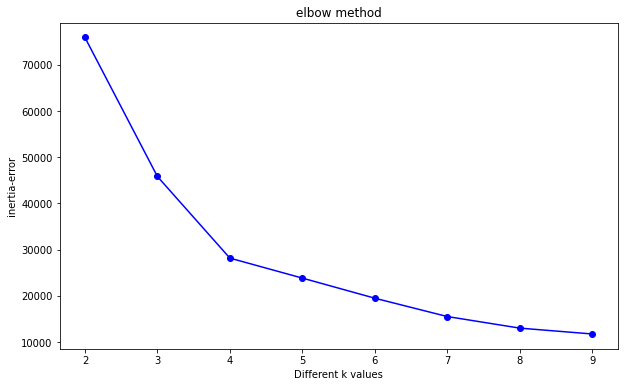

In [15]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 


In [16]:
ssd

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451]

In [17]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
dtype: float64

In [18]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332


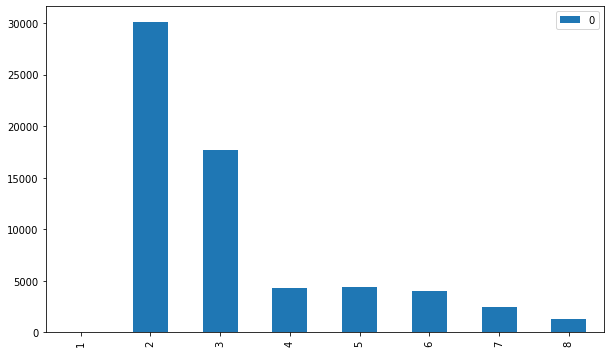

In [19]:
df_diff.plot(kind='bar')

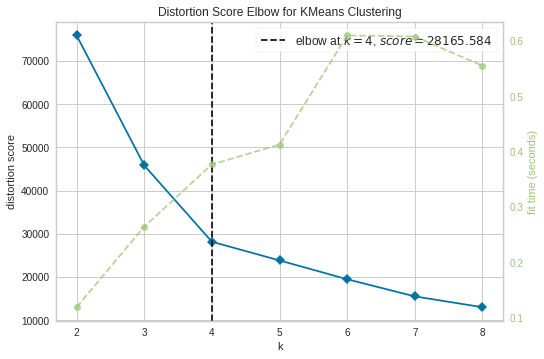

In [20]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.show();

### Why silhouette_score is negative?

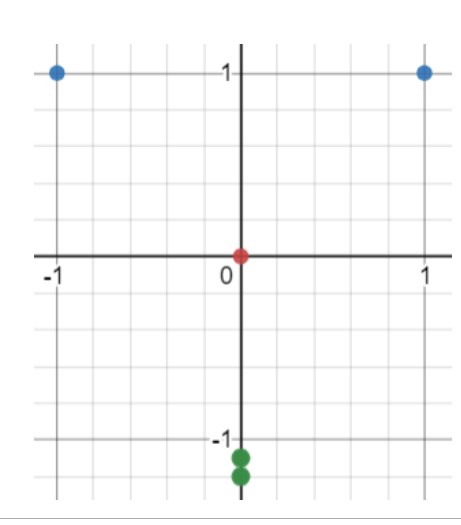

* silhouette score eksi cikarsa >>> daha fazla kume gerekiyor demektir...

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


The best score would be:  <br>
For n_clusters=4, the silhouette score is 0.49973941540141753

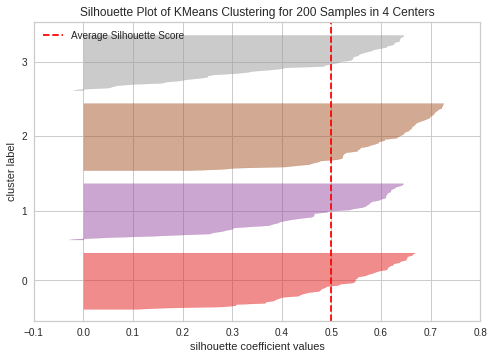

In [23]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [24]:
Kmodel = KMeans(n_clusters = 4, random_state=42)
Kmodel.fit_predict(df1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [25]:
Kclusters1 = Kmodel.labels_
df1["predicted_clusters"] = Kclusters1

In [26]:
df1.head()

,Age,Score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


Text(0.5, 1.0, 'Predicted')

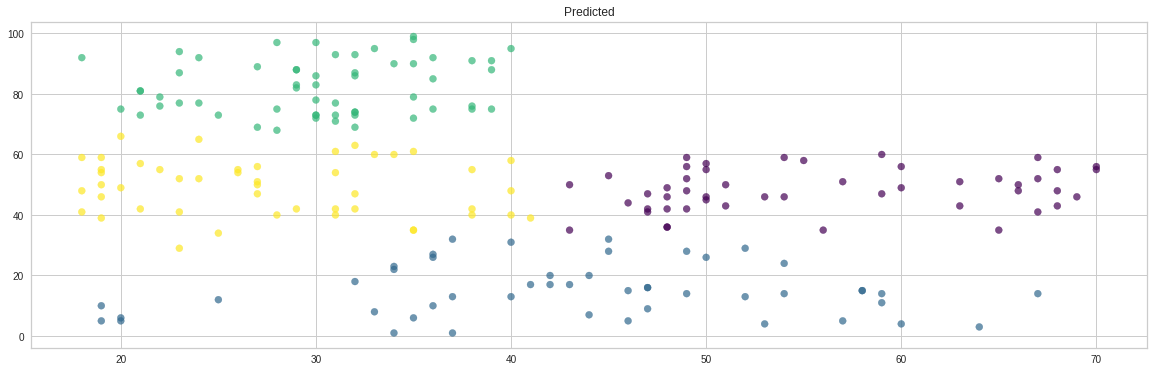

In [28]:
plt.figure(figsize = (20,6))

plt.scatter(df1["Age"], df1["Score"], c=Kclusters1, cmap = "viridis", alpha=0.7)
plt.title("Predicted")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [29]:
df2 = df[['Income', 'Score']]
df2.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

ssd:
[181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21850.165282585636]

Diffirentiative:
0             NaN
1   -75015.222897
2   -32668.584023
3   -29231.333592
4    -7214.640937
5    -6974.157303
6    -5247.817858
7    -3161.674067
dtype: float64


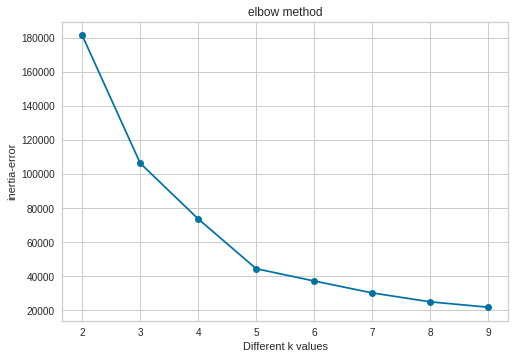

In [30]:

ssd = []

K = range(2,10) 

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df2)
    ssd.append(model.inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

print('ssd:')
print(ssd)

print()
print('Diffirentiative:')
print(pd.Series(ssd).diff())

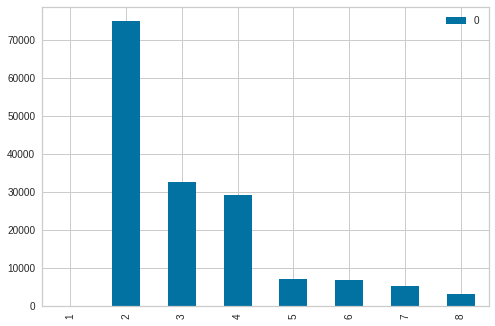

In [31]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar')

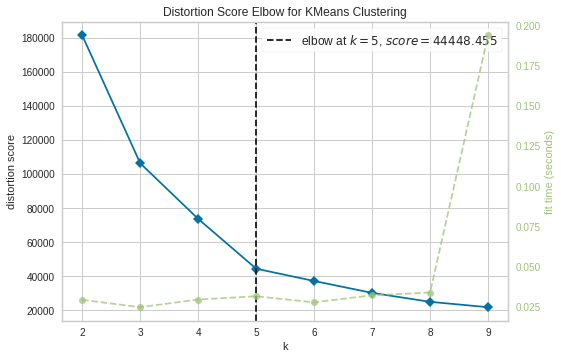

In [32]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=K)
visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show();

#### Silhouette analysis

In [33]:
Kmodel2 = KMeans(n_clusters = 5, random_state=42)
Kmodel2.fit_predict(df2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [34]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076


The best score is: <br>
For n_clusters=5, the silhouette score is 0.553931997444648

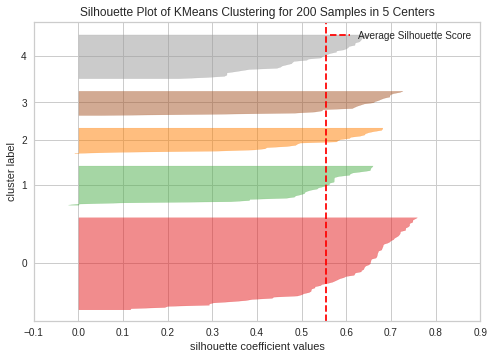

In [35]:
model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df2)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [36]:
Kmodel2 = KMeans(n_clusters =5, random_state=42)
Kmodel2.fit_predict(df2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [37]:
Kclusters2 = Kmodel2.labels_
df2["predicted_clusters"] = Kclusters2
df2.head()

,Income,Score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


Text(0.5, 1.0, 'Predicted')

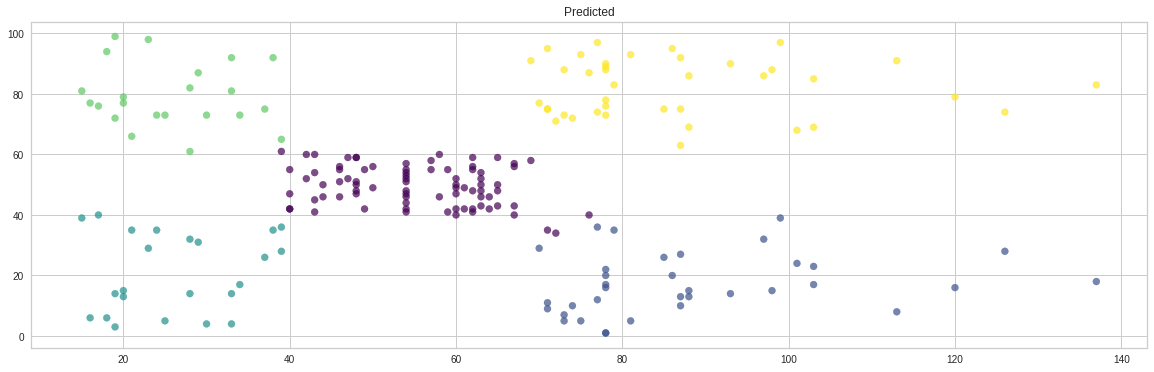

In [38]:
plt.figure(figsize = (20,6))

plt.scatter(df2["Income"], df2["Score"], c=Kclusters2, cmap = "viridis", alpha=0.7)
plt.title("Predicted")

## Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### Clustering based on Age and Spending Score- x1

In [40]:
hc_ward = linkage(y = df1, method = "ward")
hc_complete = linkage(df1, "complete")
hc_average = linkage(df1, "average")
hc_single = linkage(df1, "single")

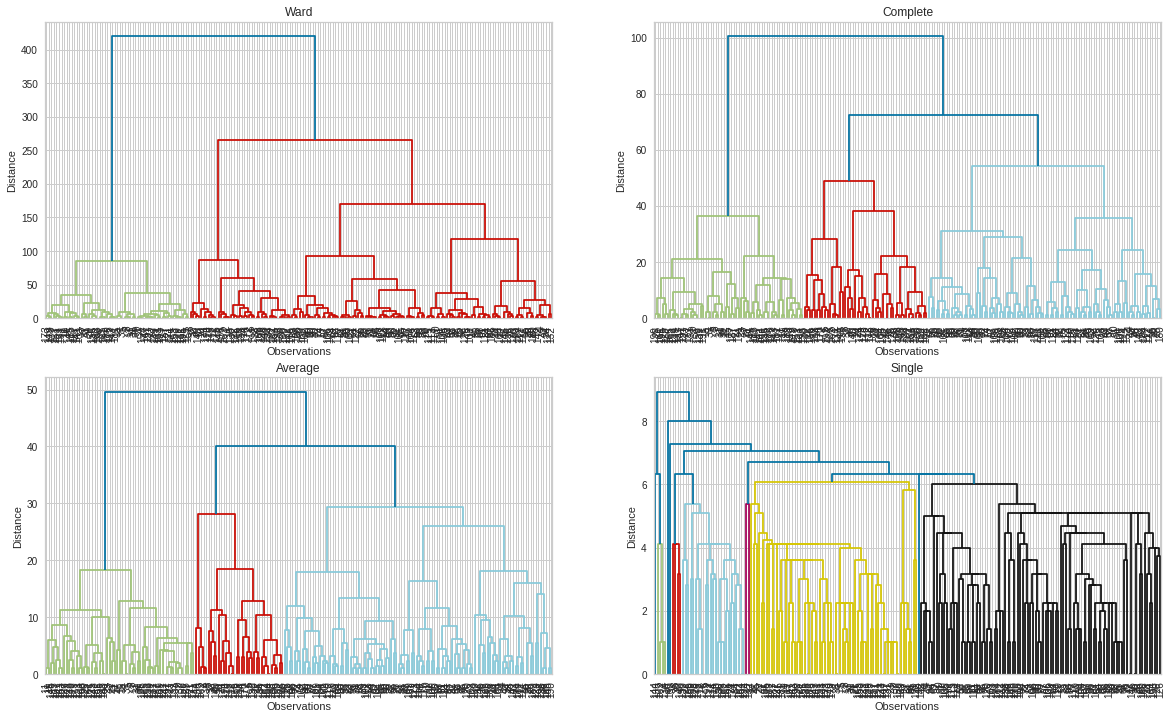

In [41]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

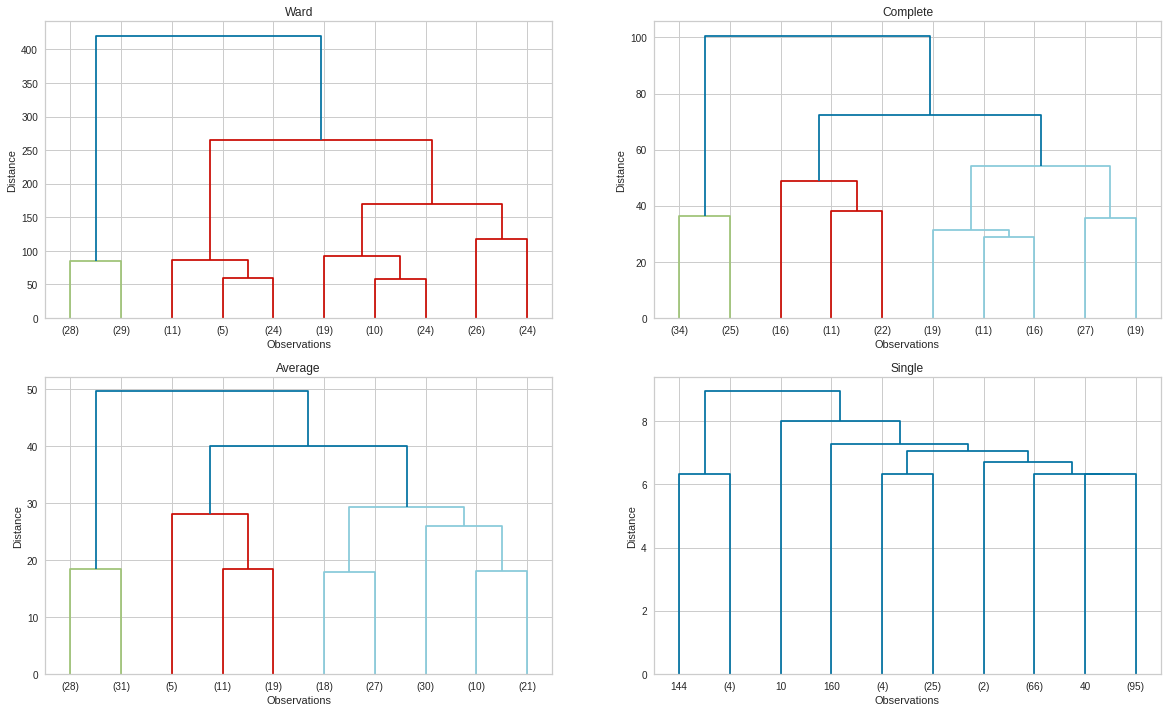

In [42]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

#### Clustering based on Annual Income and Spending Score- x2

In [43]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

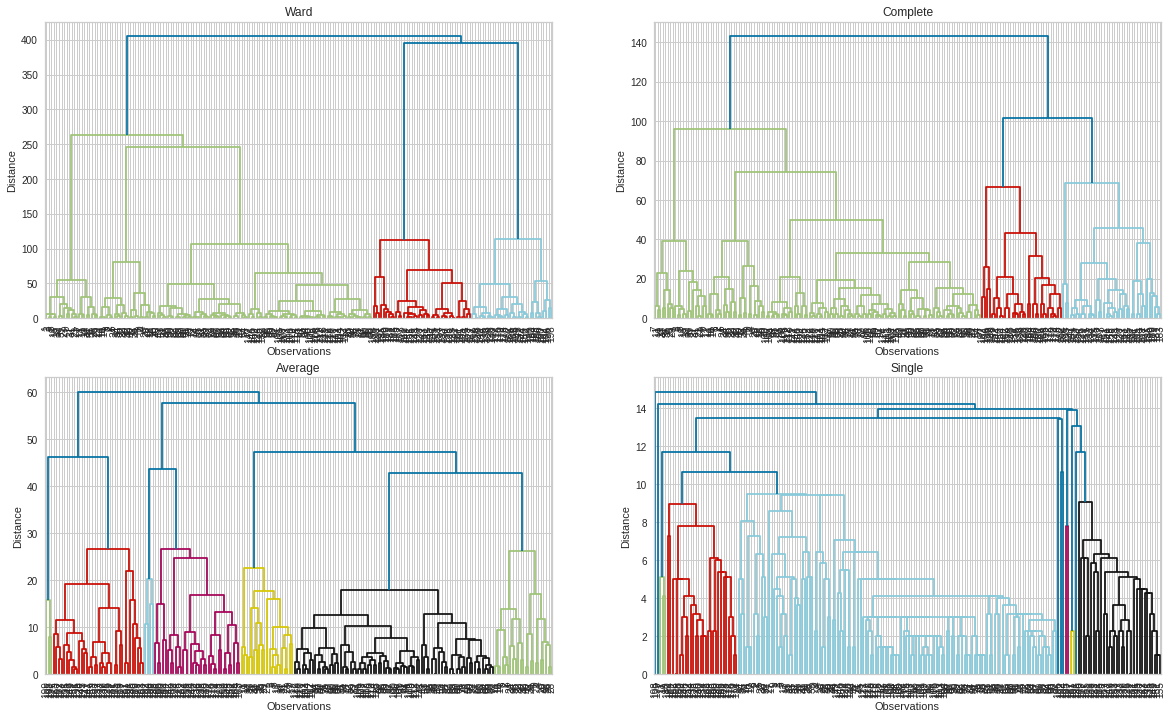

In [44]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

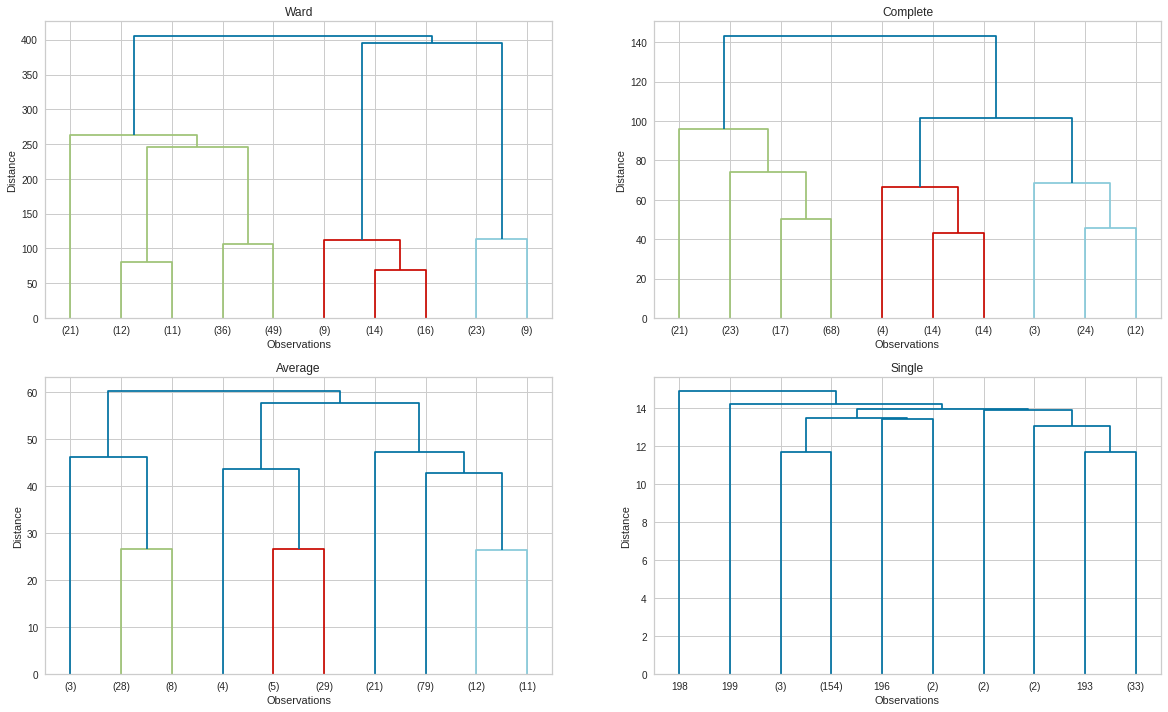

In [45]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### ii. *Apply Agglomerative Clustering*

In [46]:
from sklearn.cluster import AgglomerativeClustering

#### Age and Spending Score- x1

##### Check Silhouette Score

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.45437524400798707
Silhouette Score for 3 clusters: 0.4403939907045589
Silhouette Score for 4 clusters: 0.4605877438219549
Silhouette Score for 5 clusters: 0.4039101313348303
Silhouette Score for 6 clusters: 0.4122277010437696
Silhouette Score for 7 clusters: 0.4154024433868577
Silhouette Score for 8 clusters: 0.387772181711837
Silhouette Score for 9 clusters: 0.39419016298118076


The best Silhouette Score for 4 clusters: 0.4605877438219549

In [49]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
Aggclusters1 = model1.fit_predict(df1)
Aggclusters1

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [ ]:
plt.scatter(df1["Age"], df1["Score"], c = model1.labels_, cmap = "viridis", alpha =0.7)

#### Annual Income and Spending Score- x2

###### Silhouette Score

In [50]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36737734620684265
Silhouette Score for 3 clusters: 0.462308734038414
Silhouette Score for 4 clusters: 0.4924899099064366
Silhouette Score for 5 clusters: 0.5541332798644271
Silhouette Score for 6 clusters: 0.5390996397382017
Silhouette Score for 7 clusters: 0.520894822141792
Silhouette Score for 8 clusters: 0.43313054817610713
Silhouette Score for 9 clusters: 0.43944465774630276


The best Silhouette Score for 5 clusters: 0.5541332798644271

In [51]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
Aggclusters2 = model1.fit_predict(df2)
Aggclusters2

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

### iii. *Visualizing and Labeling All the Clusters* 

In [53]:
df1["K-Means Clusters"] = Kclusters1
df1["Agglomerative Clusters"] = Aggclusters1
df2["K-Means Clusters"] = Kclusters2
df2["Agglomerative Clusters"] = Aggclusters2

#### Age and Spending Score- x1

Text(0.5, 1.0, 'Agglomerative')

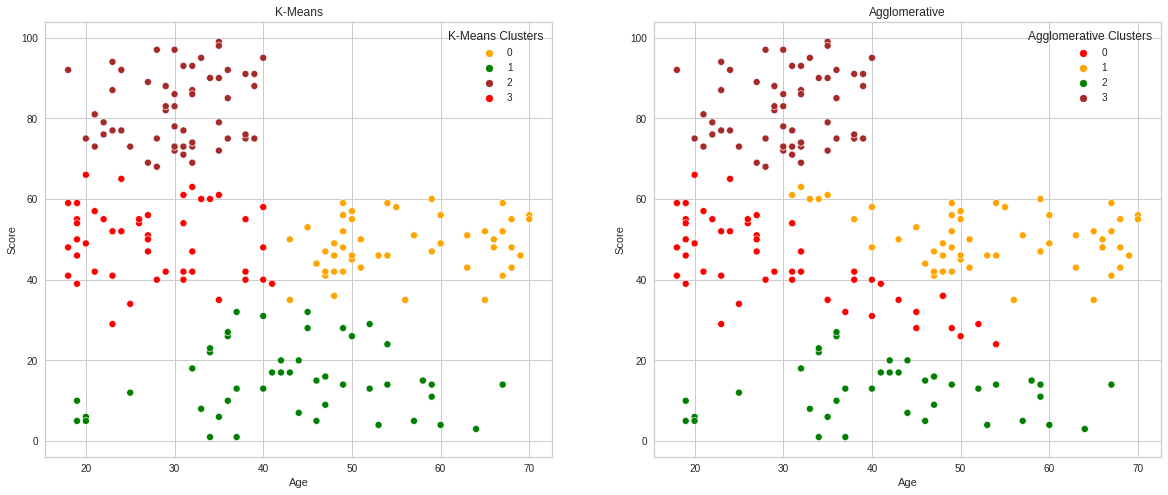

In [63]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Age', y='Score', hue='K-Means Clusters', data=df1, palette=['orange', 'green',
                                                            'brown','red'])
plt.title("K-Means")

plt.subplot(122)
sns.scatterplot(x='Age', y='Score', hue='Agglomerative Clusters', data=df1, palette=['red', 'orange',
                                                            'green', 'brown'])
plt.title("Agglomerative")

#### Interpretation based on Age and Spending Score- x1

### Conclusion

We select K-Means clustering result as our solution. Because they seem to be more proper than Agglomerative results. According to that:

**cluster 0** : The average age is around 55, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Annual Income and Spending Score- x2

Text(0.5, 1.0, 'Agglomerative')

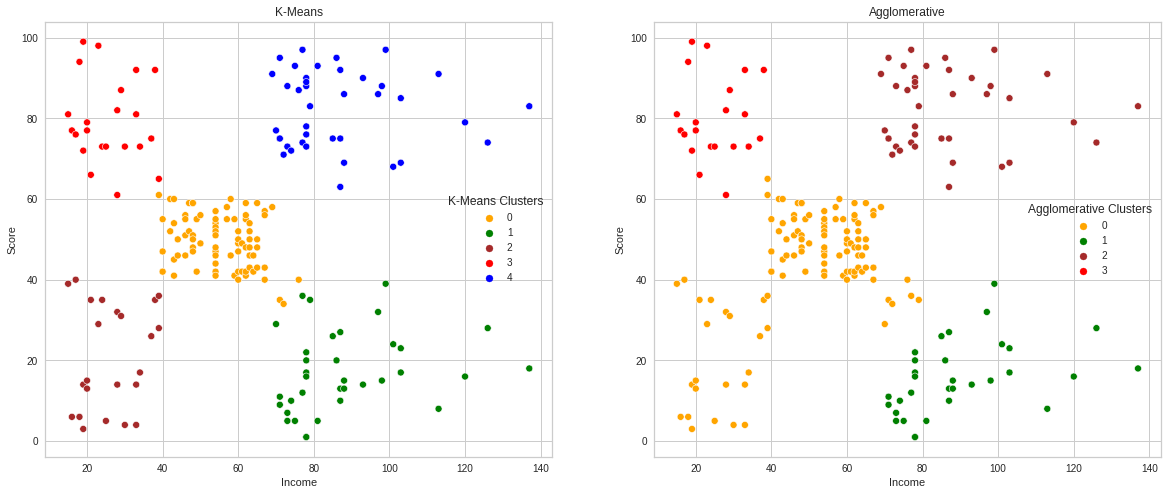

In [68]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Income', y='Score', hue='K-Means Clusters', data=df2, palette=['orange', 'green',
                                                            'brown','red', 'blue'])
plt.title("K-Means")

plt.subplot(122)
sns.scatterplot(x='Income', y='Score', hue='Agglomerative Clusters', data=df2, palette=['orange', 'green',
                                                            'brown', 'red'])
plt.title("Agglomerative")

#### Interpretation based on Annual Income and Spending Score- x2

We select K-Means clustering result as our solution. Because they seem to be more proper than Agglomerative results. According to that:

**cluster 0** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annual_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

#### Interpretation based on Gender

In [69]:
df

,Gender,Age,Income,Score
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40
...,...,...,...,...
195,0.0,35,120,79
196,0.0,45,126,28
197,1.0,32,126,74
198,1.0,32,137,18


In [72]:
X=df.copy()
X["Kmeans1"] = Kclusters1
X["Kmeans2"] = Kclusters2

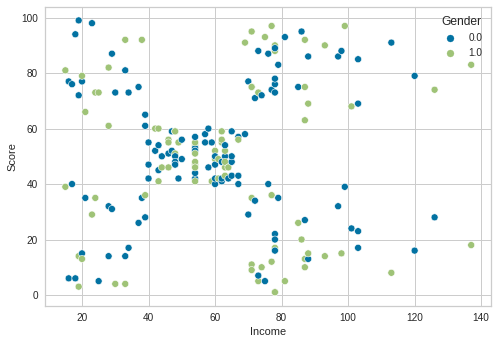

In [73]:
sns.scatterplot(x='Income', y='Score', data=X, hue='Gender')

Text(0, 0.5, 'Counts')

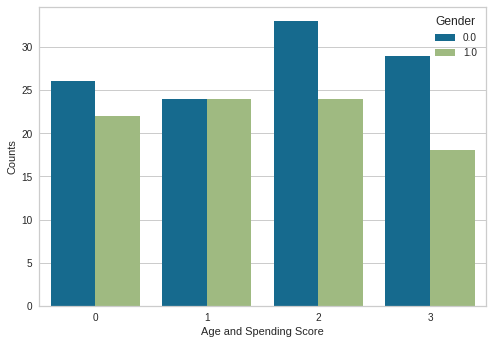

In [76]:
sns.countplot(x=X["Kmeans1"], hue=X["Gender"])
plt.xlabel("Age and Spending Score")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

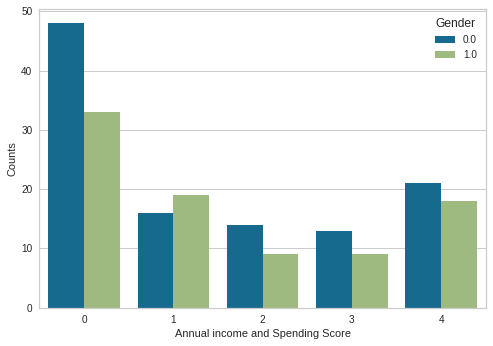

In [77]:
sns.countplot(x=X["Kmeans2"], hue=X["Gender"])
plt.xlabel("Annual income and Spending Score")
plt.ylabel("Counts")

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___